In [2]:
# Push, pull, and edit test: Alihan Ince


In [3]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'/home/alihan/Desktop/Leren & Beslissen/General/Data(LLE)/Data/Houses/Houses58-75/House64-1m.csv')
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df['Date'] = df['timestamp'].dt.date
df["Date"] = df['Date'].astype(str)
df = df.set_index('Date')
df = df.loc['2019-04-01':'2019-04-08']
df

,timestamp,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
Date,,,,,,,
2019-04-01,2019-04-01 00:00:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:01:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-01,2019-04-01 00:02:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:03:00+02:00,House64,0.0,0.24,0.0,0.24,0.24
2019-04-01,2019-04-01 00:04:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
...,...,...,...,...,...,...,...
2019-04-08,2019-04-08 23:55:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08,2019-04-08 23:56:00+02:00,House64,0.0,0.30,0.0,0.30,0.30
2019-04-08,2019-04-08 23:57:00+02:00,House64,0.0,0.24,0.0,0.24,0.24


In [5]:
import_kw = df['IMPORT_KW']
train_test_balance = len(df)//(3)
train = list(import_kw)[train_test_balance:]
test = list(import_kw)[:train_test_balance]

In [6]:
print(len(train))
print(len(test))

7680
3840


Training

In [8]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

Model

In [10]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(100,1)))
model.add(Dense(1, activation='linear'))

In [11]:
model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
237/237 [==============================] - 4s 11ms/step - loss: 0.1100 - mae: 0.1553
Epoch 2/5
237/237 [==============================] - 2s 10ms/step - loss: 0.0479 - mae: 0.0947
Epoch 3/5
237/237 [==============================] - 3s 11ms/step - loss: 0.0424 - mae: 0.0888
Epoch 4/5
237/237 [==============================] - 2s 9ms/step - loss: 0.0409 - mae: 0.0885
Epoch 5/5
237/237 [==============================] - 3s 13ms/step - loss: 0.0404 - mae: 0.0869


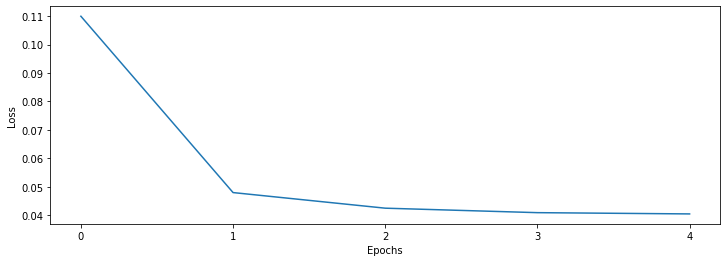

In [12]:
losses = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses)),losses);

In [13]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
237/237 [==============================] - 16s 62ms/step - loss: 0.1020 - mae: 0.1661
Epoch 2/5
237/237 [==============================] - 19s 79ms/step - loss: 0.0563 - mae: 0.1280
Epoch 3/5
237/237 [==============================] - 16s 66ms/step - loss: 0.0529 - mae: 0.1253
Epoch 4/5
237/237 [==============================] - 15s 62ms/step - loss: 0.0470 - mae: 0.1122
Epoch 5/5
237/237 [==============================] - 17s 70ms/step - loss: 0.0436 - mae: 0.1006


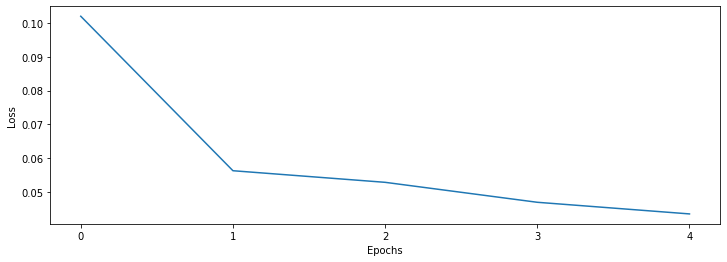

In [14]:
losses = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses)),losses);

In [15]:
y_pred_model = model.predict(X_train)

In [16]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.20262543329655072


Test

In [17]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [18]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [19]:
y_test_pred_model = model.predict(X_test)

In [20]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.1901213477537127


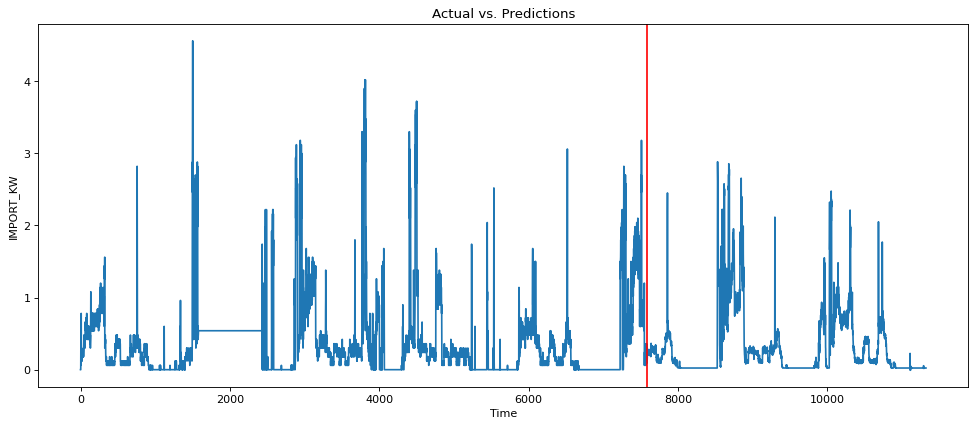

In [21]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    result = np.append(y_train, y_test_pred_model)
#     predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(result)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), result)
#     plt.plot(range(rows), y_test_pred_model)
    plt.axvline(x=len(y_train), color='r')
#     plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

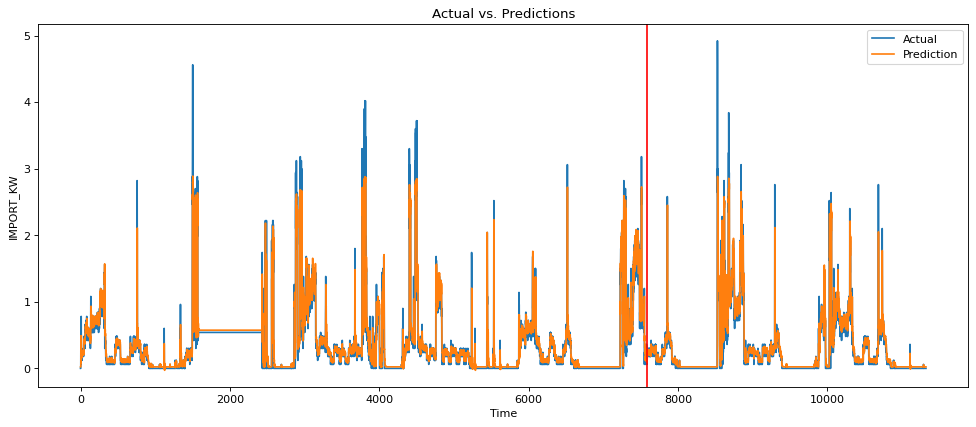

In [22]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [23]:
print(rmse_train)
print(rmse_test)

0.20262543329655072
0.1901213477537127
